# Introduction to Matplotlib

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

[]

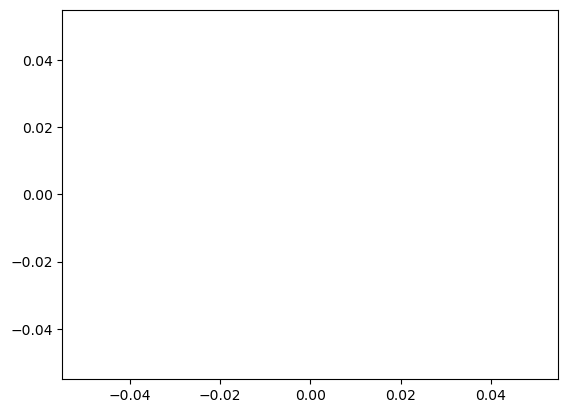

In [2]:
plt.plot()

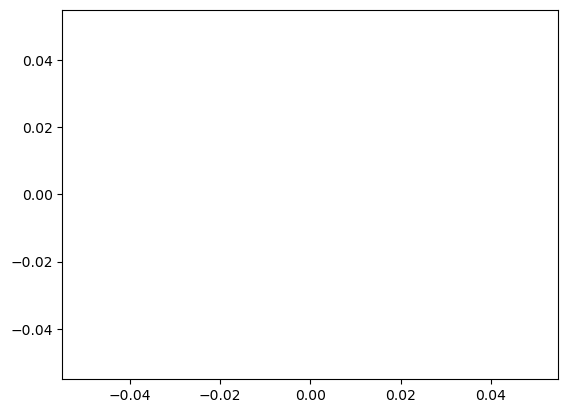

In [3]:
plt.plot();

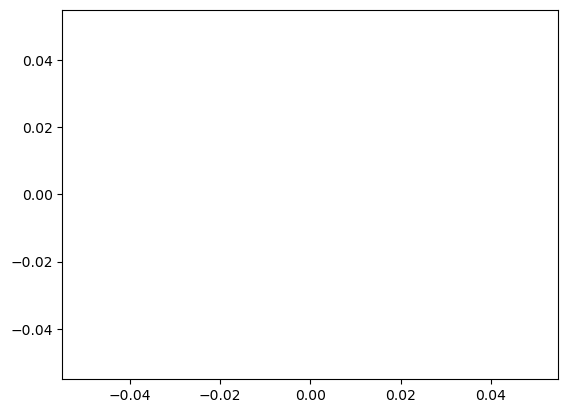

In [4]:
plt.plot()
plt.show()

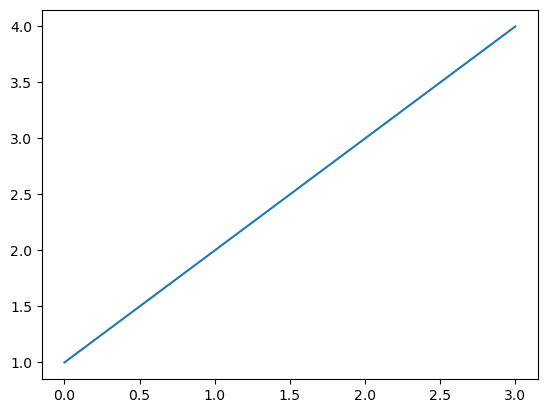

In [5]:
plt.plot([1, 2, 3, 4]);

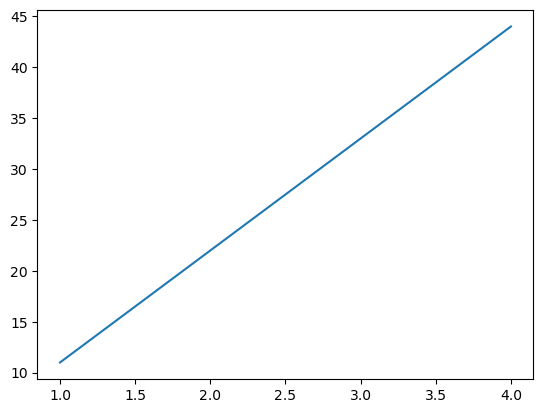

In [6]:
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]
plt.plot(x, y);

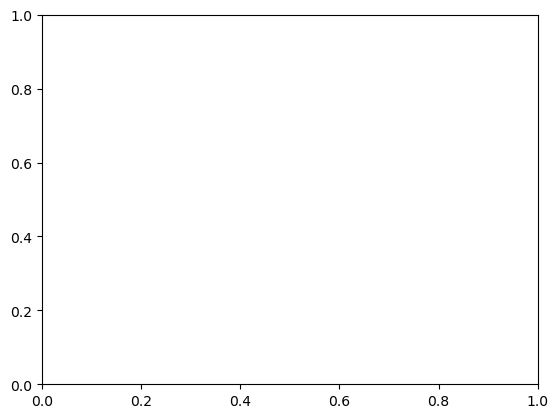

In [7]:
# 1st method
fig = plt.figure() # creates a figure
ax = fig.add_subplot() # adds some axes
plt.show()

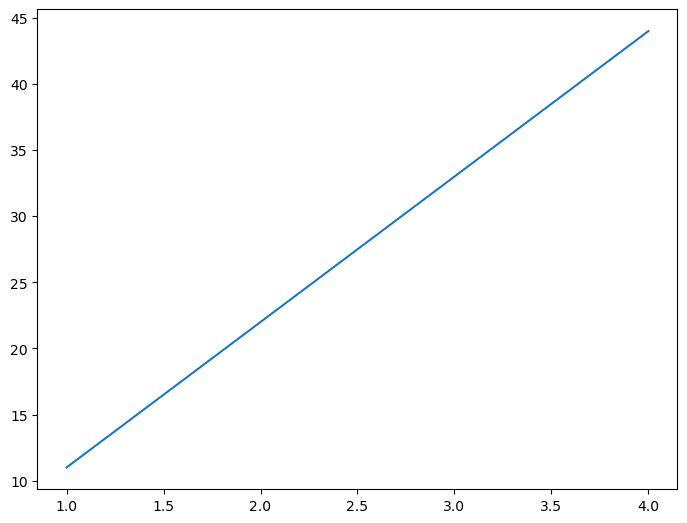

In [8]:
# 2nd method
fig = plt.figure() # creates figure
ax = fig.add_axes([1, 1, 1, 1])
ax.plot(x, y)
plt.show()

(matplotlib.figure.Figure, matplotlib.axes._subplots.AxesSubplot)

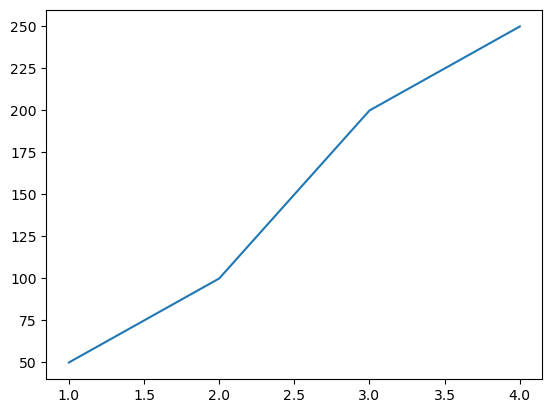

In [11]:
# 3rd method (recommended)
fig, ax = plt.subplots()
ax.plot(x, [50, 100, 200, 250]); # add some data
type(fig), type(ax)

## Matplotlib example workflow
We want:
* Line plot
* Scatter plot
* Bar plot
* Histogram
* Subplots

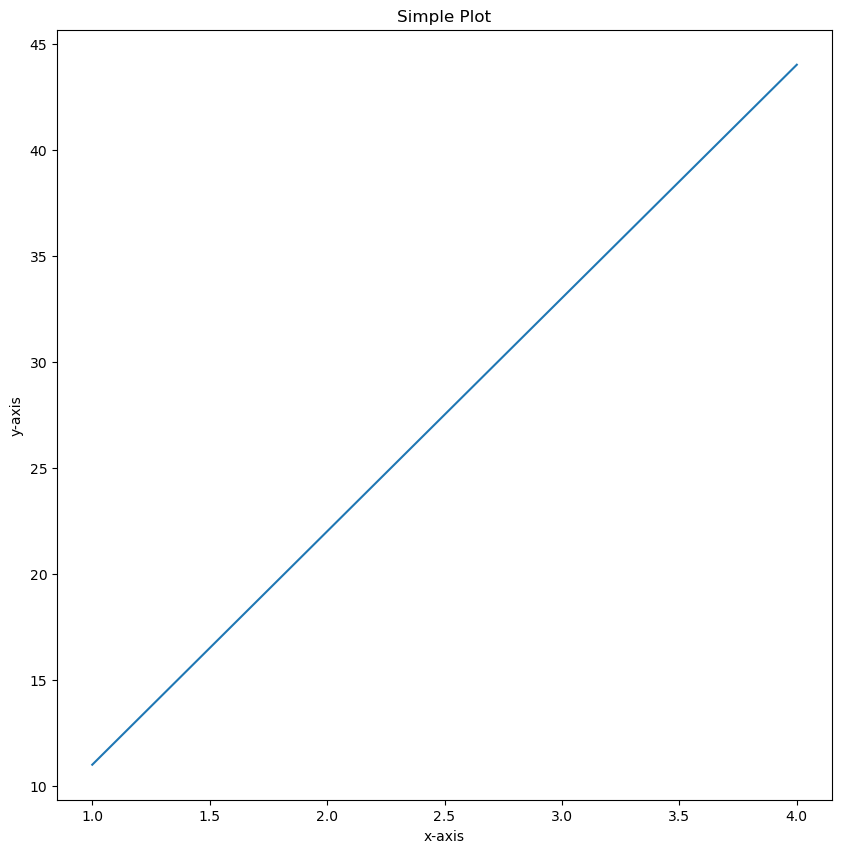

In [12]:
# 0. import matplotlib and get it ready for plotting in Jupyter Notebook
%matplotlib inline
import matplotlib.pyplot as plt

# 1. Prepare data
x = [1, 2, 3, 4]
y = [11, 22, 33, 44]

# 2. Setup plot
fig, ax = plt.subplots(figsize=(10, 10)) # width, figure

# 3. Plot data
ax.plot(x, y)

# 4. Customize plot
ax.set(title="Simple Plot",
      xlabel="x-axis",
      ylabel="y-axis")

# 5. Save & show (you save the whole figure)
fig.savefig("../images/sample-plot.png")

## Making figure with NumPy arrays

In [13]:
import numpy as np

In [14]:
# Create some data
x = np.linspace(0, 10, 100)
x[:10]

array([0.        , 0.1010101 , 0.2020202 , 0.3030303 , 0.4040404 ,
       0.50505051, 0.60606061, 0.70707071, 0.80808081, 0.90909091])

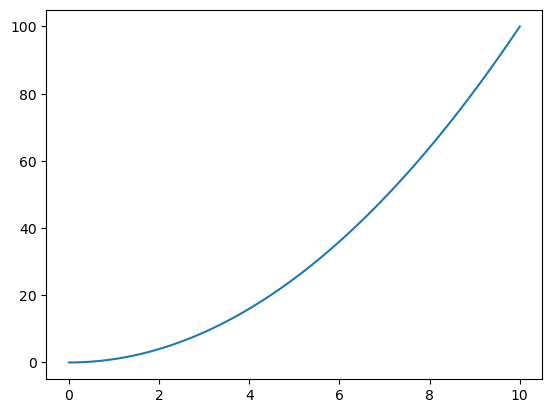

In [15]:
# Plot the data and create a line plot
fig, ax = plt.subplots()
ax.plot(x, x**2)

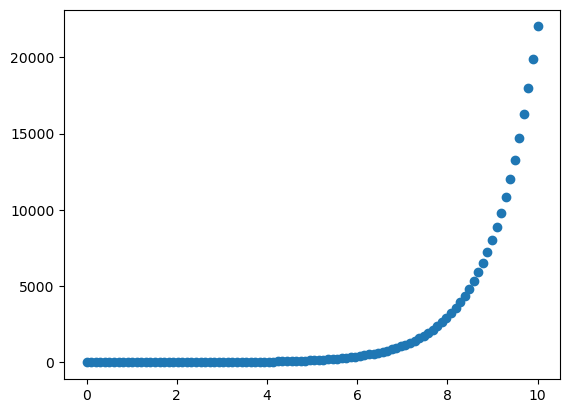

In [16]:
# Use same data to make a scatter
fig, ax = plt.subplots()
ax.scatter(x, np.exp(x));

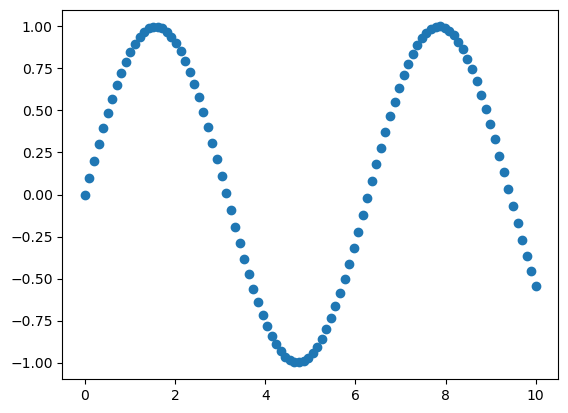

In [17]:
# Another scatter plot
fig, ax = plt.subplots()
ax.scatter(x, np.sin(x));

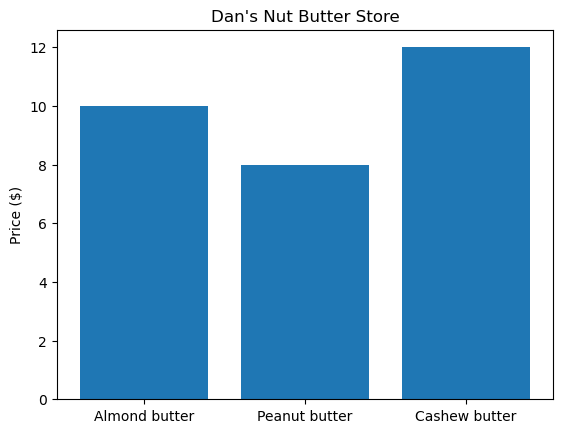

In [21]:
# Make a plot from dictionary
nut_butter_prices = {"Almond butter": 10,
                    "Peanut butter": 8,
                    "Cashew butter": 12}
fig, ax = plt.subplots()
ax.bar(nut_butter_prices.keys(), nut_butter_prices.values()) # (x, y)
ax.set(title="Dan's Nut Butter Store",
      ylabel="Price ($)");

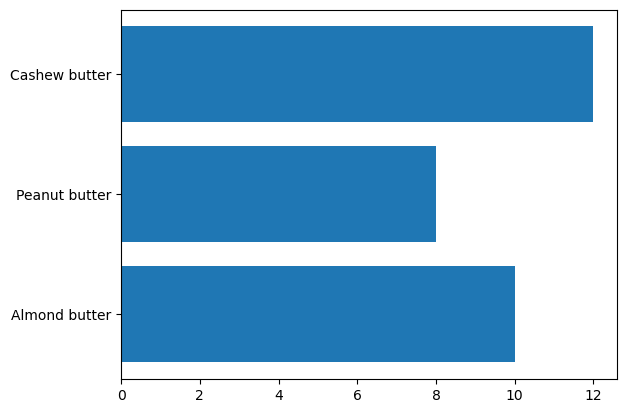

In [24]:
fig, ax = plt.subplots()
ax.barh(list(nut_butter_prices.keys()), list(nut_butter_prices.values()));

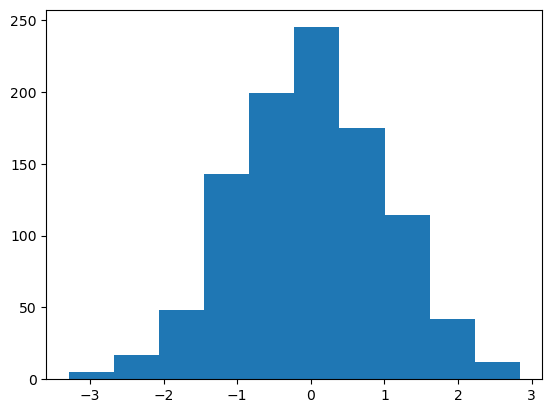

In [25]:
# Make some data for histograms and plot it
x = np.random.randn(1000)
fig, ax = plt.subplots()
ax.hist(x);

### Two options for subplots

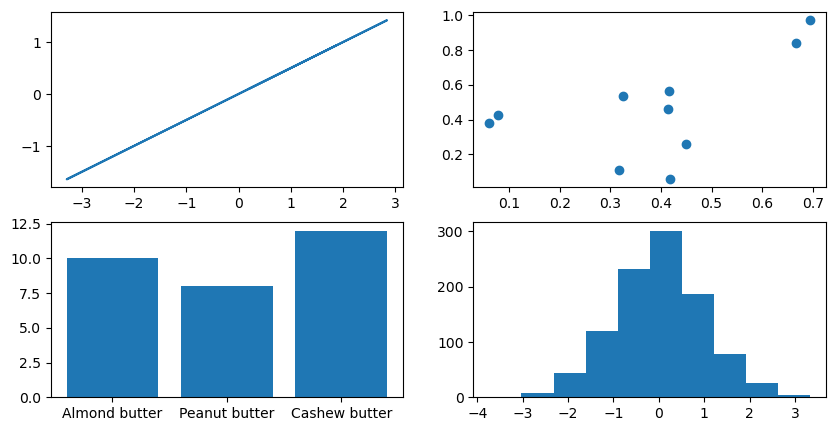

In [29]:
# Subplot option 1
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2,
                                            ncols=2,
                                            figsize=(10, 5))
# Plot to each dofferent axis
ax1.plot(x, x/2);
ax2.scatter(np.random.random(10), np.random.random(10));
ax3.bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax4.hist(np.random.randn(1000));

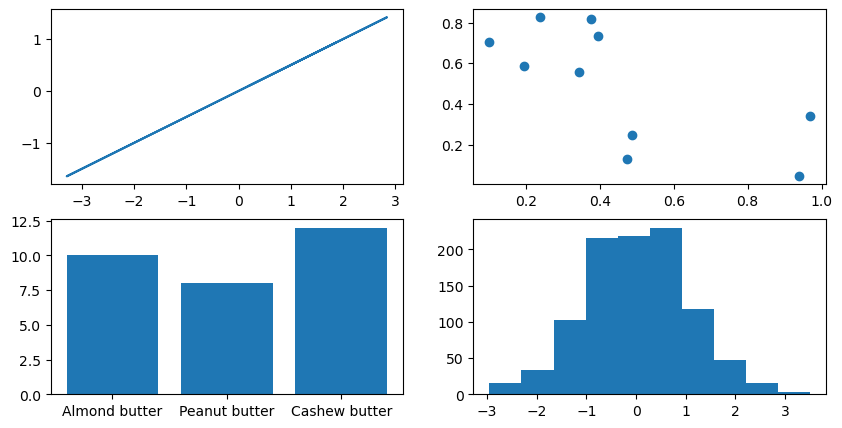

In [32]:
# Subplots option 2
fig, ax = plt.subplots(nrows=2,
                      ncols=2,
                      figsize=(10, 5))
# Plot to each different index
ax[0, 0].plot(x, x/2);
ax[0, 1].scatter(np.random.random(10), np.random.random(10));
ax[1, 0].bar(nut_butter_prices.keys(), nut_butter_prices.values());
ax[1, 1].hist(np.random.randn(1000));

## Plotting from pandas DataFrame

In [33]:
import pandas as pd

In [37]:
# Make a dataframe
car_sales = pd.read_csv("data/car-sales.csv")
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


<AxesSubplot:>

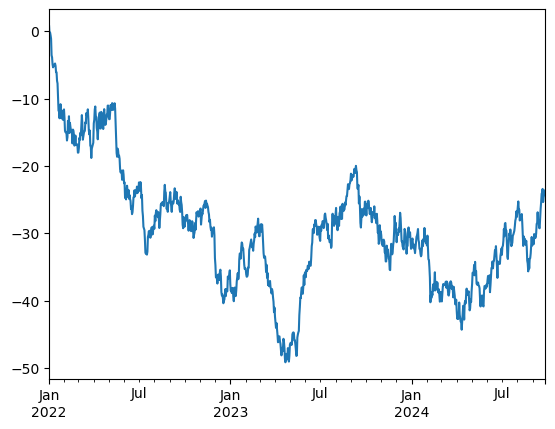

In [44]:
ts = pd.Series(np.random.randn(1000),
              index=pd.date_range('1/1/2022', periods=1000))
ts = ts.cumsum()
ts.plot()

In [45]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,"$4,000.00"
1,Honda,Red,87899,4,"$5,000.00"
2,Toyota,Blue,32549,3,"$7,000.00"
3,BMW,Black,11179,5,"$22,000.00"
4,Nissan,White,213095,4,"$3,500.00"
5,Toyota,Green,99213,4,"$4,500.00"
6,Honda,Blue,45698,4,"$7,500.00"
7,Honda,Blue,54738,4,"$7,000.00"
8,Toyota,White,60000,4,"$6,250.00"
9,Nissan,White,31600,4,"$9,700.00"


In [52]:
car_sales["Price"] = car_sales["Price"].astype(str).str.replace('\$\,\.', "", regex=False)
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,400000
1,Honda,Red,87899,4,500000
2,Toyota,Blue,32549,3,700000
3,BMW,Black,11179,5,2200000
4,Nissan,White,213095,4,350000
5,Toyota,Green,99213,4,450000
6,Honda,Blue,45698,4,750000
7,Honda,Blue,54738,4,700000
8,Toyota,White,60000,4,625000
9,Nissan,White,31600,4,970000


In [53]:
type(car_sales["Price"][0])

str

In [54]:
# Remove last two zeros
car_sales['Price'] = car_sales["Price"].str[:-2]

In [55]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Toyota,White,150043,4,4000
1,Honda,Red,87899,4,5000
2,Toyota,Blue,32549,3,7000
3,BMW,Black,11179,5,22000
4,Nissan,White,213095,4,3500
5,Toyota,Green,99213,4,4500
6,Honda,Blue,45698,4,7500
7,Honda,Blue,54738,4,7000
8,Toyota,White,60000,4,6250
9,Nissan,White,31600,4,9700


In [56]:
car_sales["Sale Date"] = pd.date_range("1/1/2022", periods=len(car_sales))
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date
0,Toyota,White,150043,4,4000,2022-01-01
1,Honda,Red,87899,4,5000,2022-01-02
2,Toyota,Blue,32549,3,7000,2022-01-03
3,BMW,Black,11179,5,22000,2022-01-04
4,Nissan,White,213095,4,3500,2022-01-05
5,Toyota,Green,99213,4,4500,2022-01-06
6,Honda,Blue,45698,4,7500,2022-01-07
7,Honda,Blue,54738,4,7000,2022-01-08
8,Toyota,White,60000,4,6250,2022-01-09
9,Nissan,White,31600,4,9700,2022-01-10


In [57]:
car_sales["Total Sales"] = car_sales["Price"].astype(int).cumsum()
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,9000
2,Toyota,Blue,32549,3,7000,2022-01-03,16000
3,BMW,Black,11179,5,22000,2022-01-04,38000
4,Nissan,White,213095,4,3500,2022-01-05,41500
5,Toyota,Green,99213,4,4500,2022-01-06,46000
6,Honda,Blue,45698,4,7500,2022-01-07,53500
7,Honda,Blue,54738,4,7000,2022-01-08,60500
8,Toyota,White,60000,4,6250,2022-01-09,66750
9,Nissan,White,31600,4,9700,2022-01-10,76450


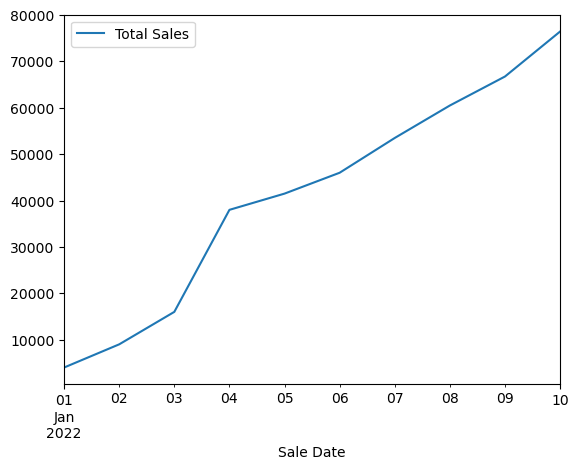

In [59]:
# Lets plot the total sales
car_sales.plot(x="Sale Date", y="Total Sales");

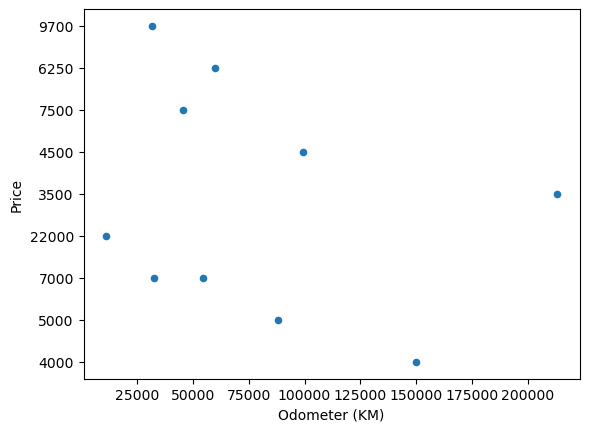

In [61]:
# Reassign price column to int
car_sales["Total Sales"] = car_sales["Price"].astype(int)
# Plot scatter plot with price column as numeric
car_sales.plot(x="Odometer (KM)", y="Price", kind="scatter");

In [62]:
# How about a bar graph?
x = np.random.rand(10, 4)
x
# Turn it into a dataframe
df = pd.DataFrame(x, columns=('a', 'b', 'c', 'd'))
df

,a,b,c,d
0,0.765086,0.478964,0.272884,0.418569
1,0.131658,0.552327,0.559746,0.965968
2,0.949138,0.553455,0.112588,0.345719
3,0.947697,0.202012,0.636553,0.254072
4,0.879822,0.613415,0.325974,0.748020
5,0.498228,0.101237,0.453822,0.066465
6,0.966718,0.801916,0.414764,0.241240
7,0.102601,0.764788,0.501483,0.120357
8,0.578360,0.500105,0.085997,0.572369
9,0.636379,0.980222,0.081630,0.539277


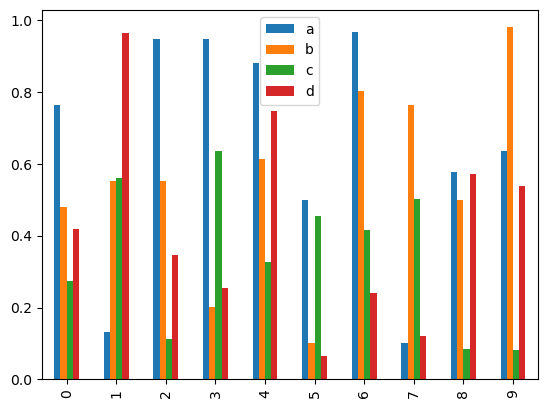

In [63]:
df.plot.bar();

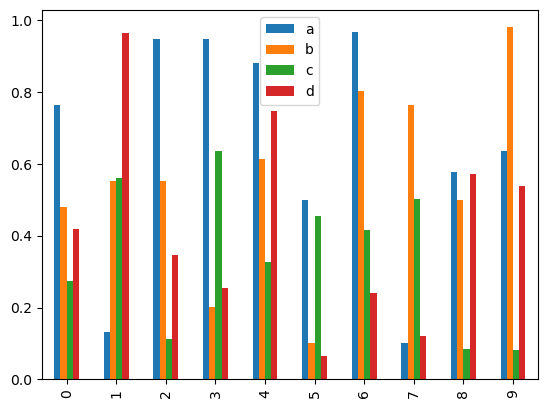

In [65]:
df.plot(kind='bar');

In [67]:
car_sales

,Make,Colour,Odometer (KM),Doors,Price,Sale Date,Total Sales
0,Toyota,White,150043,4,4000,2022-01-01,4000
1,Honda,Red,87899,4,5000,2022-01-02,5000
2,Toyota,Blue,32549,3,7000,2022-01-03,7000
3,BMW,Black,11179,5,22000,2022-01-04,22000
4,Nissan,White,213095,4,3500,2022-01-05,3500
5,Toyota,Green,99213,4,4500,2022-01-06,4500
6,Honda,Blue,45698,4,7500,2022-01-07,7500
7,Honda,Blue,54738,4,7000,2022-01-08,7000
8,Toyota,White,60000,4,6250,2022-01-09,6250
9,Nissan,White,31600,4,9700,2022-01-10,9700


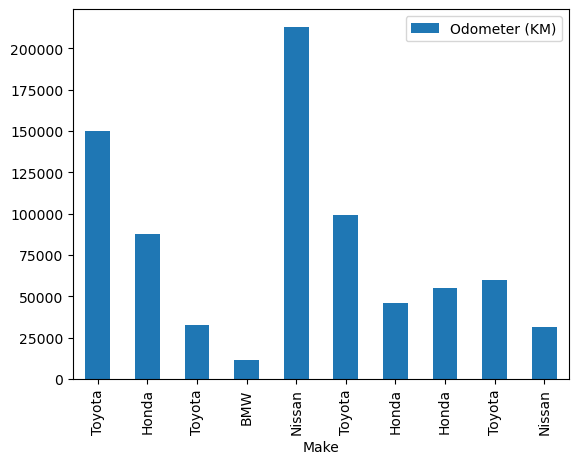

In [68]:
car_sales.plot(x="Make", y="Odometer (KM)", kind="bar");

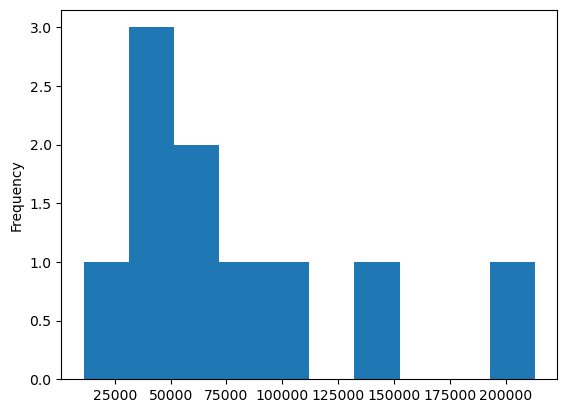

In [69]:
# How about histograms?
car_sales["Odometer (KM)"].plot.hist();

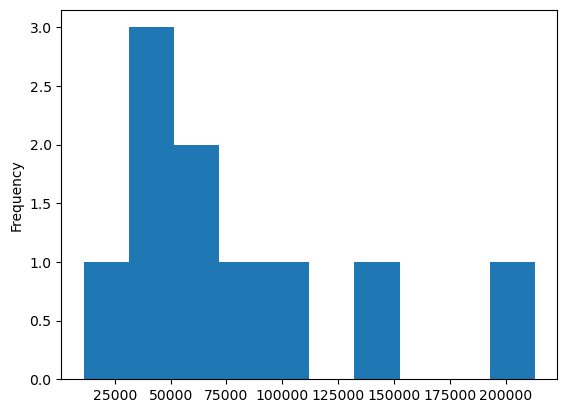

In [71]:
car_sales["Odometer (KM)"].plot(kind="hist");

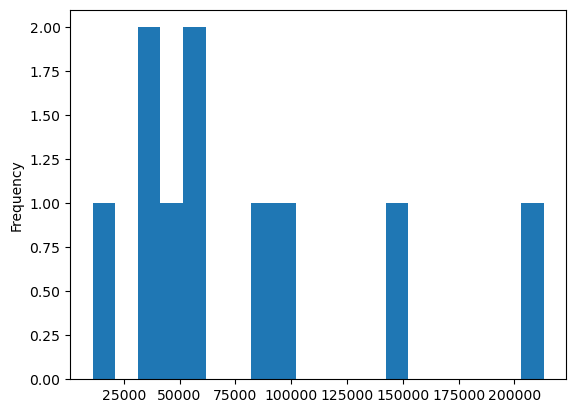

In [72]:
car_sales["Odometer (KM)"].plot.hist(bins=20);

In [73]:
# Let's try on another dataset
heart_disease = pd.read_csv('../data/heart-disease.csv')
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [74]:
heart_disease.shape

(303, 14)

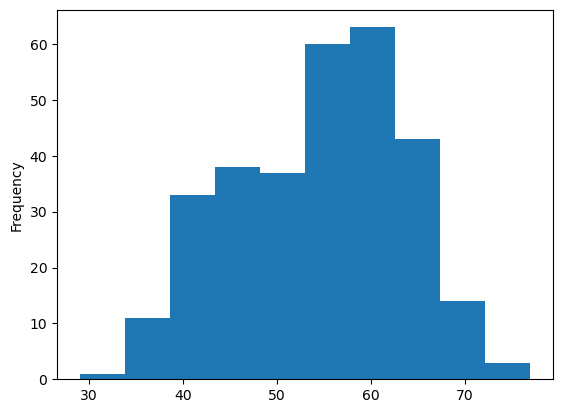

In [80]:
# Create a histogram of age
heart_disease['age'].plot.hist(bins=10);

In [81]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


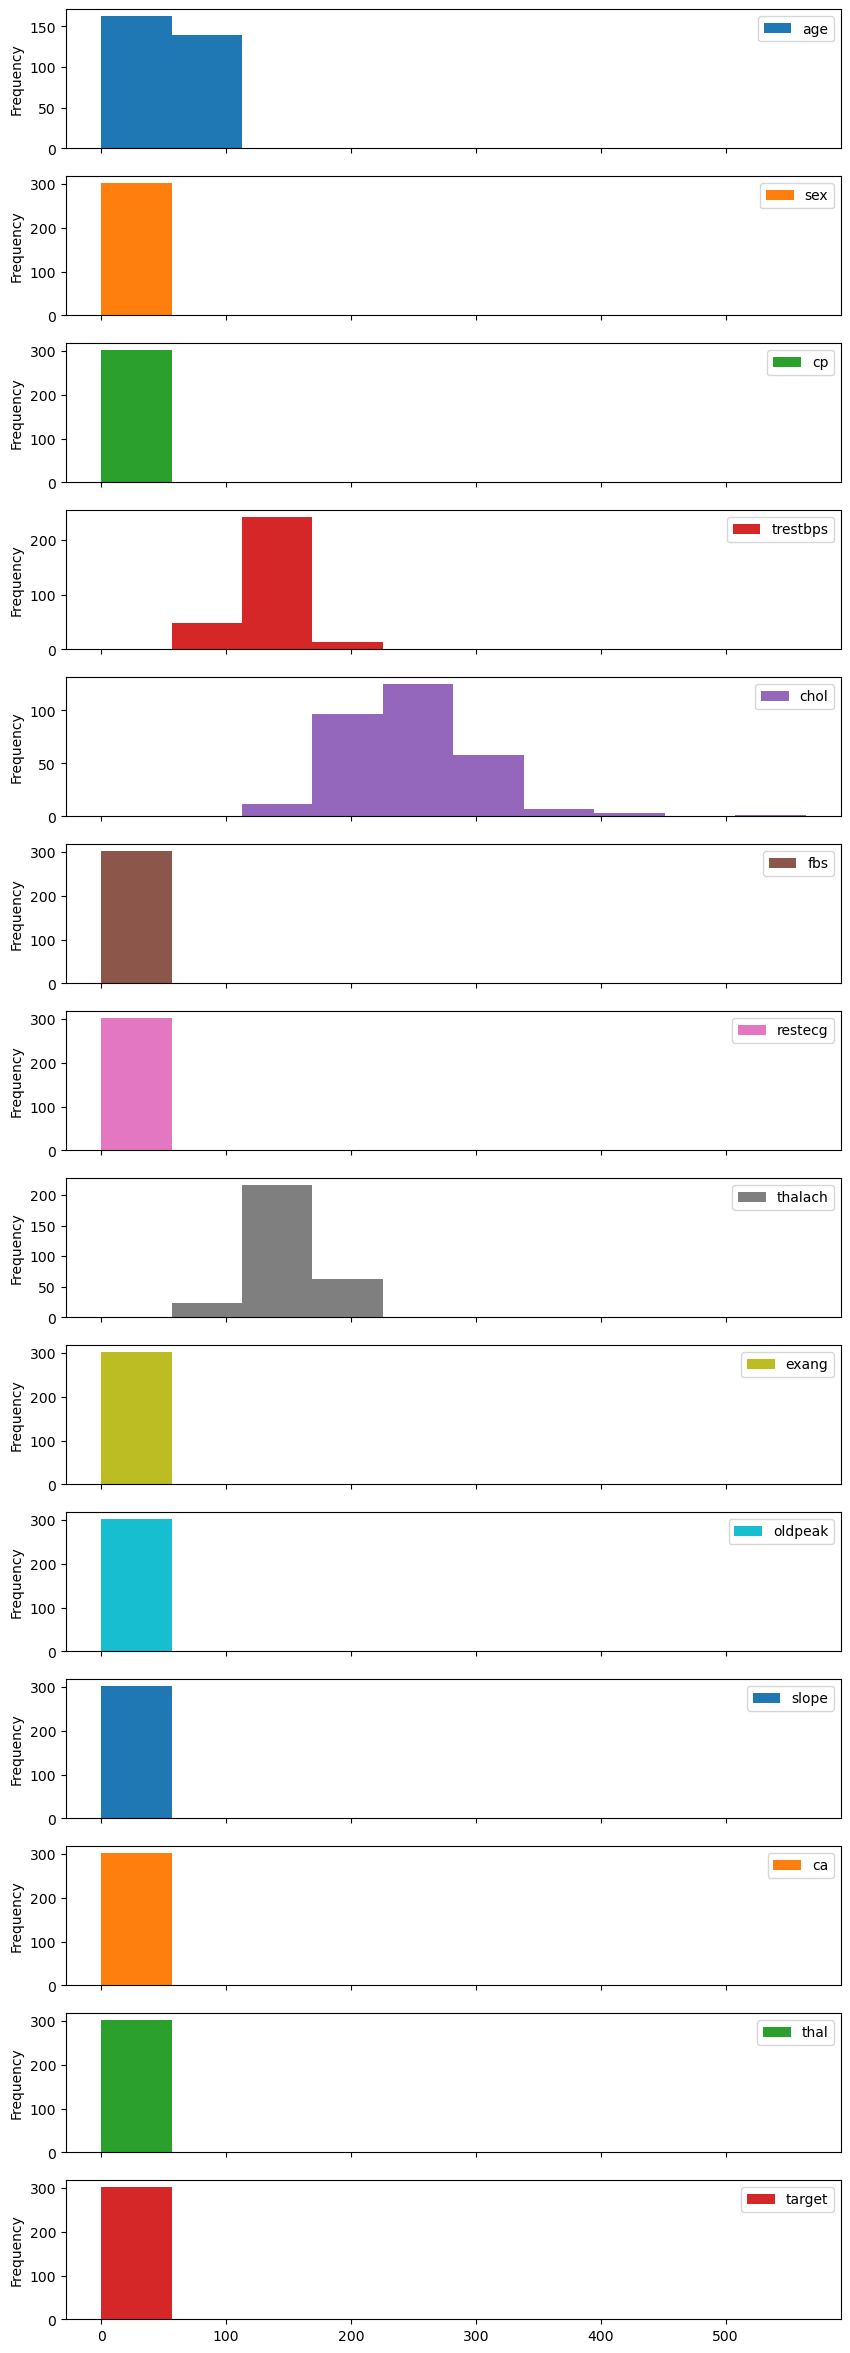

In [83]:
heart_disease.plot.hist(figsize=(10, 30), subplots=True);

### Which one should you use? (pyplot vs matplotlib OO method?)

* When plotting something quickly, okay to use the pyplot method
* When plotting something more advanced, use the OO method

In [86]:
over_50 = heart_disease[heart_disease["age"] > 50]
over_50.shape

(208, 14)

In [87]:
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


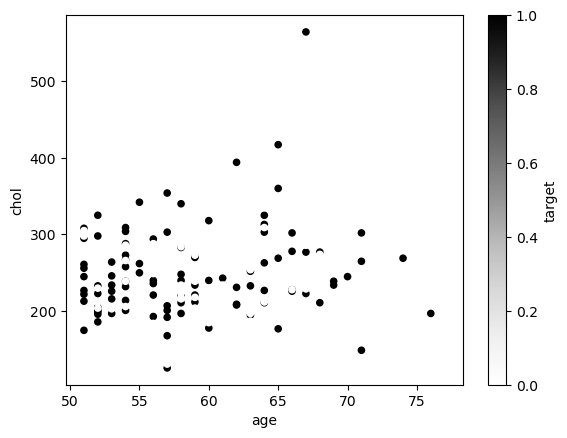

In [88]:
# Pyplot method
over_50.plot(kind="scatter",
            x="age",
            y="chol",
            c="target");

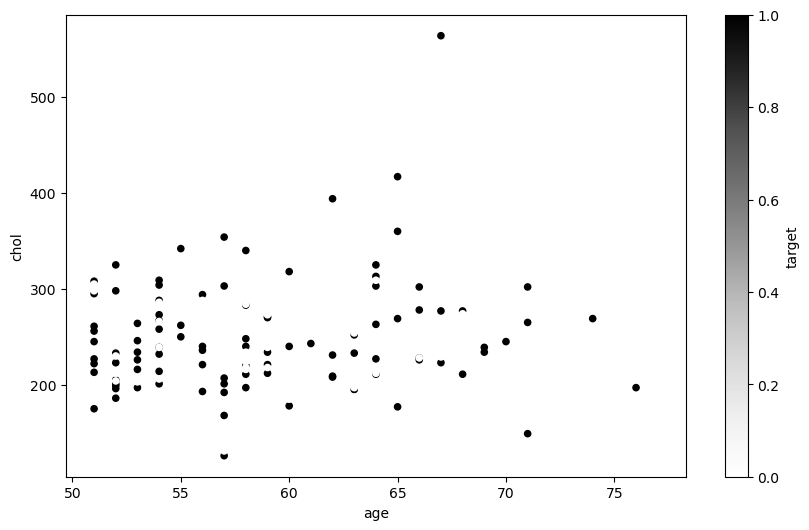

In [95]:
#  OO method mixed with pyplot method
fig, ax = plt.subplots(figsize=(10, 6))
over_50.plot(kind='scatter',
            x='age',
            y='chol',
            c='target',
            ax=ax);
# ax.set_xlim([45, 100])

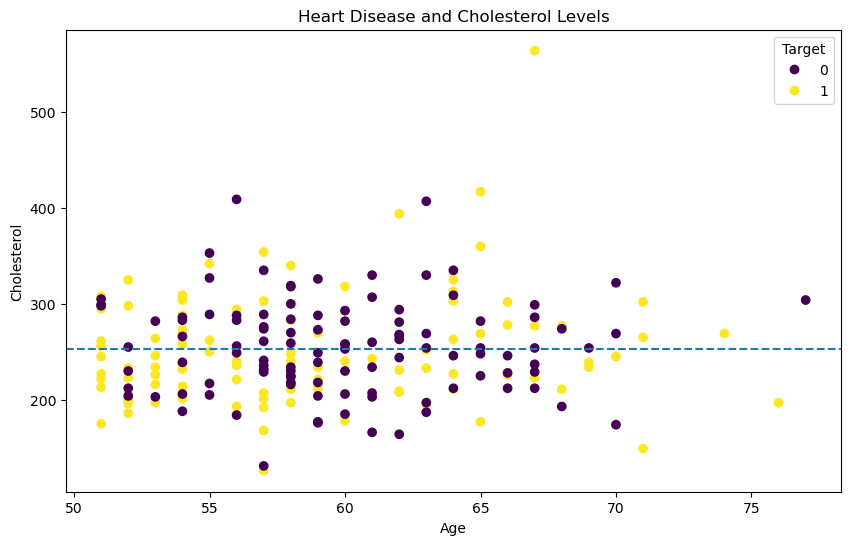

In [99]:
## OO method from scratch
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the data
scatter = ax.scatter(x=over_50["age"],
                    y=over_50["thalach"],
                    c=over_50["target"])

# Customize the plot
ax.set(title="Heart Disease and Heart Rate",
      xlabel="Age",
      ylabel="Heart Rate")

# Add a legend
ax.legend(*scatter.legend_elements(), title="Target");

# Add a horizontal line
ax.axhline(over_50["thalach"].mean(),
          linestyle="--");

In [101]:
# Subplot of chol, age, thalach
over_50.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1


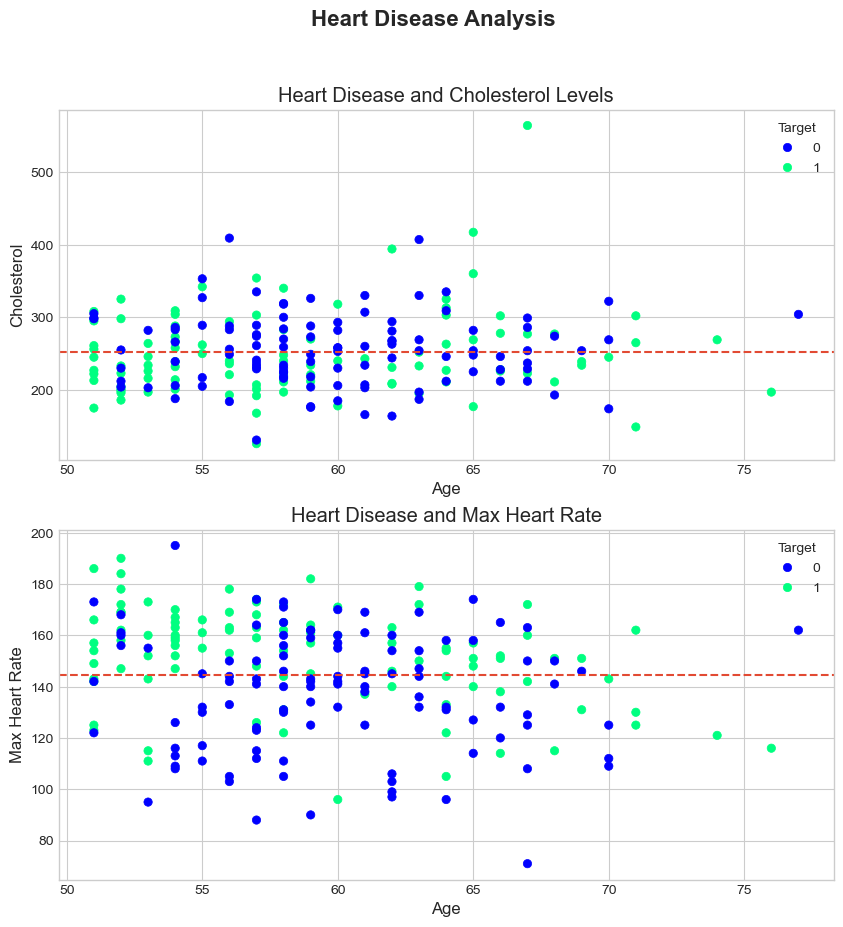

In [117]:
# Set the style
plt.style.use('seaborn-whitegrid')
# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10, 10))

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")

# Add a legent to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                     cmap="winter")
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")

# Add a legent to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# Add a title to thefigure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

## Customizing Matplotlib plots and getting stylish

In [113]:
# See the different styles available
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

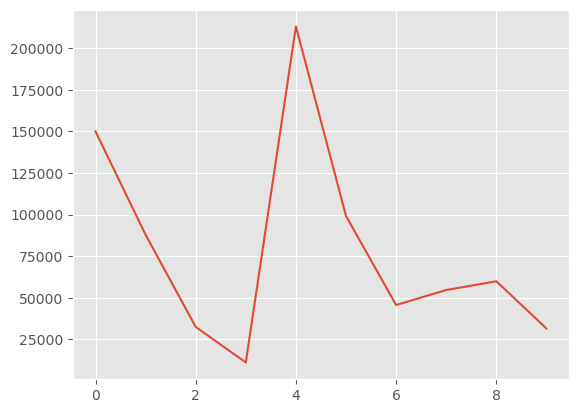

In [115]:
plt.style.use("ggplot")
car_sales["Odometer (KM)"].plot();

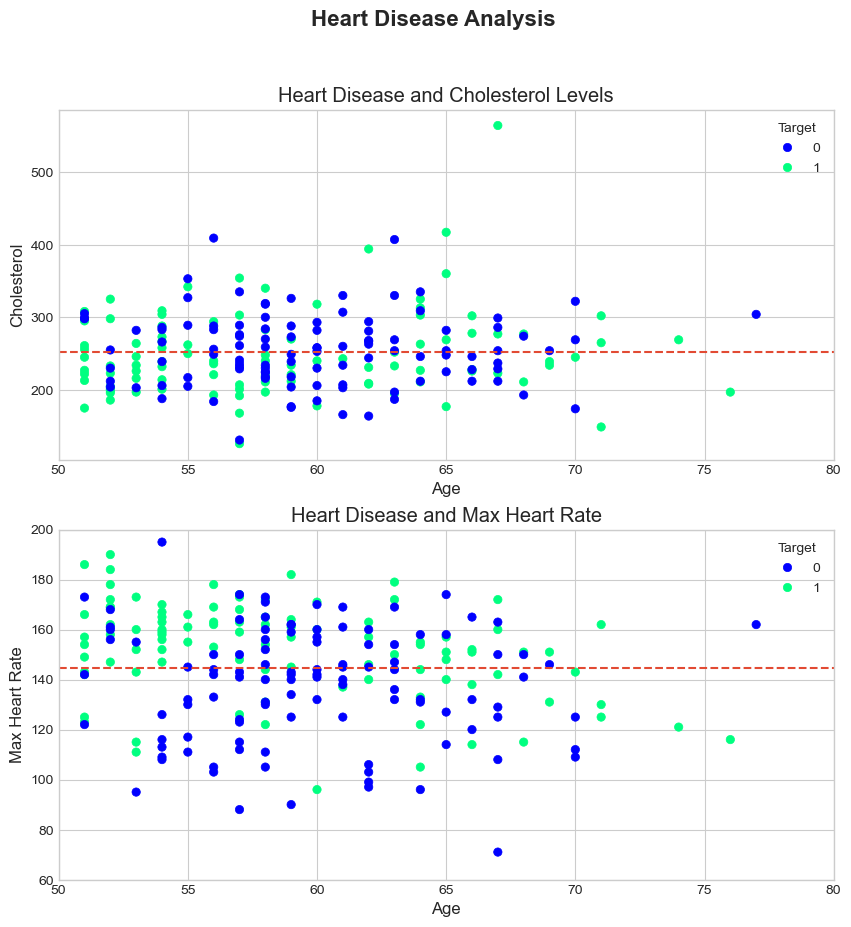

In [120]:
# Set the style
plt.style.use('seaborn-whitegrid')

# Subplot of chol, age, thalach
fig, (ax0, ax1) = plt.subplots(nrows=2,
                              ncols=1,
                              figsize=(10, 10))

# Add data to ax0
scatter = ax0.scatter(x=over_50["age"],
                     y=over_50["chol"],
                     c=over_50["target"],
                     cmap="winter")
# Customize ax0
ax0.set(title="Heart Disease and Cholesterol Levels",
       xlabel="Age",
       ylabel="Cholesterol")
# change x axis limits
ax0.set_xlim([50, 80])

# Add a legent to ax0
ax0.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax0.axhline(y=over_50["chol"].mean(),
           linestyle="--");

# Add data to ax1
scatter = ax1.scatter(x=over_50["age"],
                     y=over_50["thalach"],
                     c=over_50["target"],
                     cmap="winter")
# Customize ax1
ax1.set(title="Heart Disease and Max Heart Rate",
       xlabel="Age",
       ylabel="Max Heart Rate")

# Change x & y axis limits
ax1.set_xlim([50, 80])
ax1.set_ylim([60, 200])

# Add a legent to ax1
ax1.legend(*scatter.legend_elements(), title="Target")

# Add a meanline
ax1.axhline(y=over_50["thalach"].mean(),
           linestyle="--");

# Add a title to thefigure
fig.suptitle("Heart Disease Analysis", fontsize=16, fontweight="bold");

In [121]:
# Save and share figure
fig.savefig("../images/heart-disease-analysis-plot.png")